# Chapter 2: Comparing the Order of Octaves and the Order of Fifths

***

In [2]:
# Before we begin, there a couple of tools to import (hit shift-enter)
import IPython.display as ipd

import jupyter_pt_tools as jpt_pt
import pt_utils

Take one closer look (below) at the difference between the chromatic and circle-of-fifths representations. There are interesting things to note about their organization, or lack of it.

1. The graph above has **maximum entropy**; the graph below, **minimum entropy**. The two representations are **precisely reciprocal** in this way.
2. There are seven white notes and five black ones: each division of the twelve notes is a  **prime numbers**.
3. Starting at C in the chromatic graph below, counting every second tone, and looping around afther the 7th tone, yields a major scale
4. The black notes also form a complete pentatonic scale.
5. The white notes are outlined by a tritone (F-B), implying the seventh harmonic of the harmonic series.
6. The black notes are outlined by a major third (F#-Bb), implying the fifth harmonic of the harmonic series.

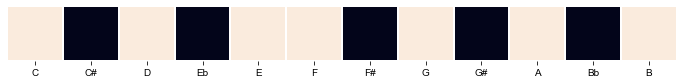

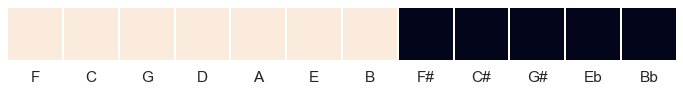

In [2]:
c_major_scale = 0b101011010101

jpt_pt.notegroup_heatmap(c_major_scale, chromatic=True, title="Chromatic C Major Scale")
# switch the bits to fifths order (FCGDAE etc.)
c_major_circle = pt_utils.c_chrom_to_f_circle(c_major_scale)
# redraw
jpt_pt.notegroup_heatmap(c_major_circle, chromatic=False, title="Fifths C Major Scale")

c_major_circle_signal = jpt_pt.notegroup_wavestep(c_major_circle, chromatic=False)
ipd.Audio(c_major_circle_signal, rate=4000)

## The inverse:

And here is the reverse: a chromatic tritone given in both forms. It's precisely the opposite.

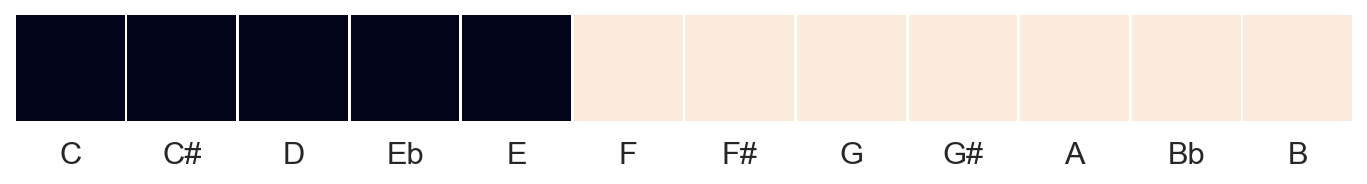

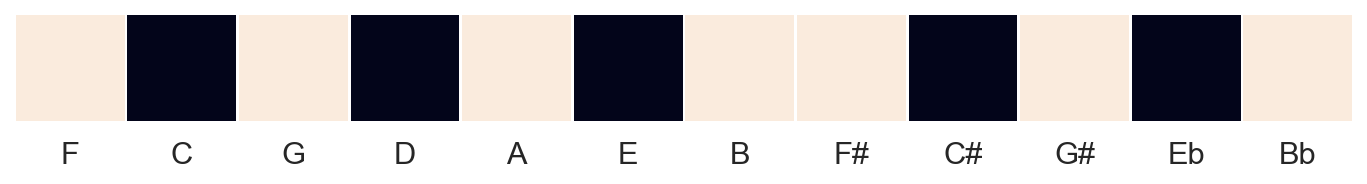

In [7]:
chromatic_tritone = 0b1111111

jpt_pt.notegroup_heatmap(chromatic_tritone, chromatic=True, title="Chromatic Tritone")
# switch the bits to fifths order (FCGDAE etc.)
circle_fifth = pt_utils.c_chrom_to_f_circle(chromatic_tritone)
# redraw
jpt_pt.notegroup_heatmap(circle_fifth, chromatic=False, title="Fifths Tritone")

c_major_circle_signal = jpt_pt.notegroup_wavepile(chromatic_tritone, chromatic=True)
ipd.Audio(c_major_circle_signal, rate=4000)

# By the way: The Complementary Pentatonic System

The complement of this seven-tone scale is also a stable and meaningful system of tonal organization: a pentatonic scale. It also shows both a visible and audible level of tonal organization -- more common, even, than a seven-note scale.

It also has few enough notes that it can be heard as a single chord. (given here in C major, for simplicity).

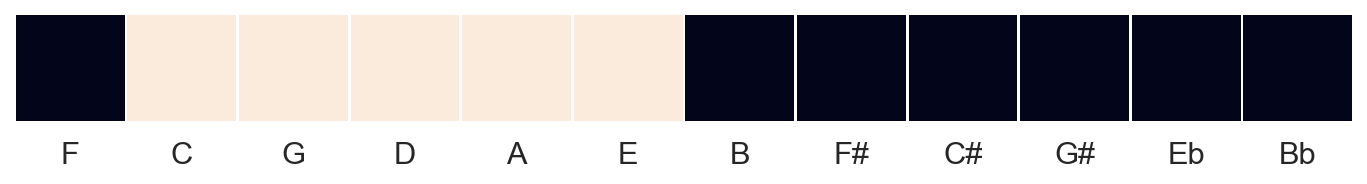

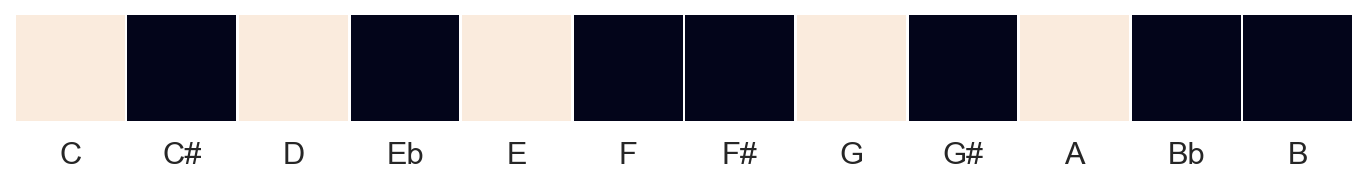

In [5]:
c_pent = 0b11111000000
jpt_pt.notegroup_heatmap(c_pent)

c_pent_circle = pt_utils.f_circle_to_c_chrom(c_pent)
jpt_pt.notegroup_heatmap(c_pent_circle, chromatic=True)

f_sharp_pent_signal = jpt_pt.notegroup_wavepile(c_pent_circle, chromatic=True)
ipd.Audio(f_sharp_pent_signal, rate=4000)

And for completeness, here is the reverse: five chromatic notes, shown in both formats (note that it makes a lousy chord):

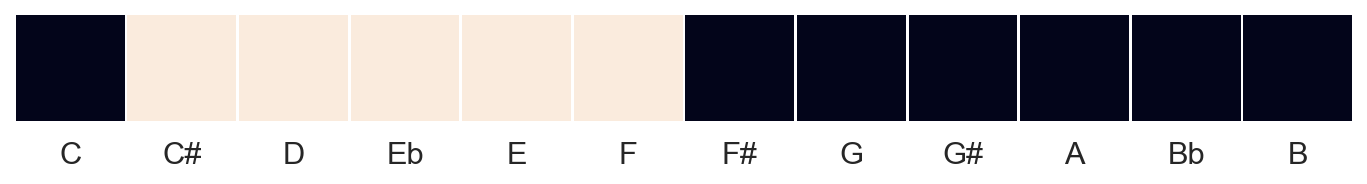

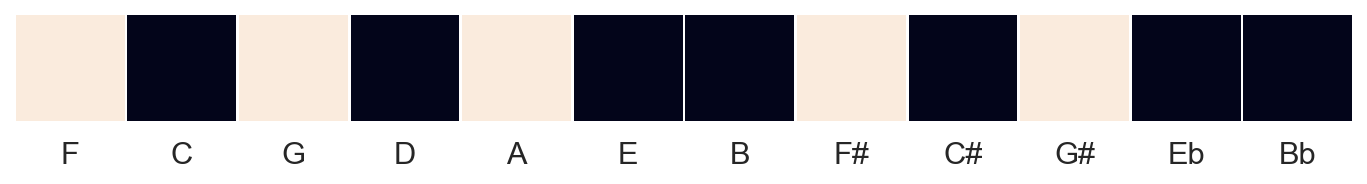

In [5]:
chromatic_third = c_pent

jpt_pt.notegroup_heatmap(chromatic_third, chromatic=True, title="Chromatic Fifth")
# switch the bits to fifths order (FCGDAE etc.)
circle_third = pt_utils.f_circle_to_c_chrom(chromatic_third)
# redraw
jpt_pt.notegroup_heatmap(circle_third, chromatic=False, title="Fifths Fifth")

c_major_circle_signal = jpt_pt.notegroup_wavepile(circle_third)
ipd.Audio(c_major_circle_signal, rate=4000)

These two systems, seven-note and five-note, cover an enormous amount of conventional harmonic usage, and they can be mined much further for harmonic information.

Above all, these structures can serve as a source of 'hidden states' in both musical and computational memory.

***

# Two consequences: 1) for theory and 2) for audio

## 1) changing key

In the circle of fifths organization, changing key takes on a different aspect -- rather more organized. It is simply a bit shift.

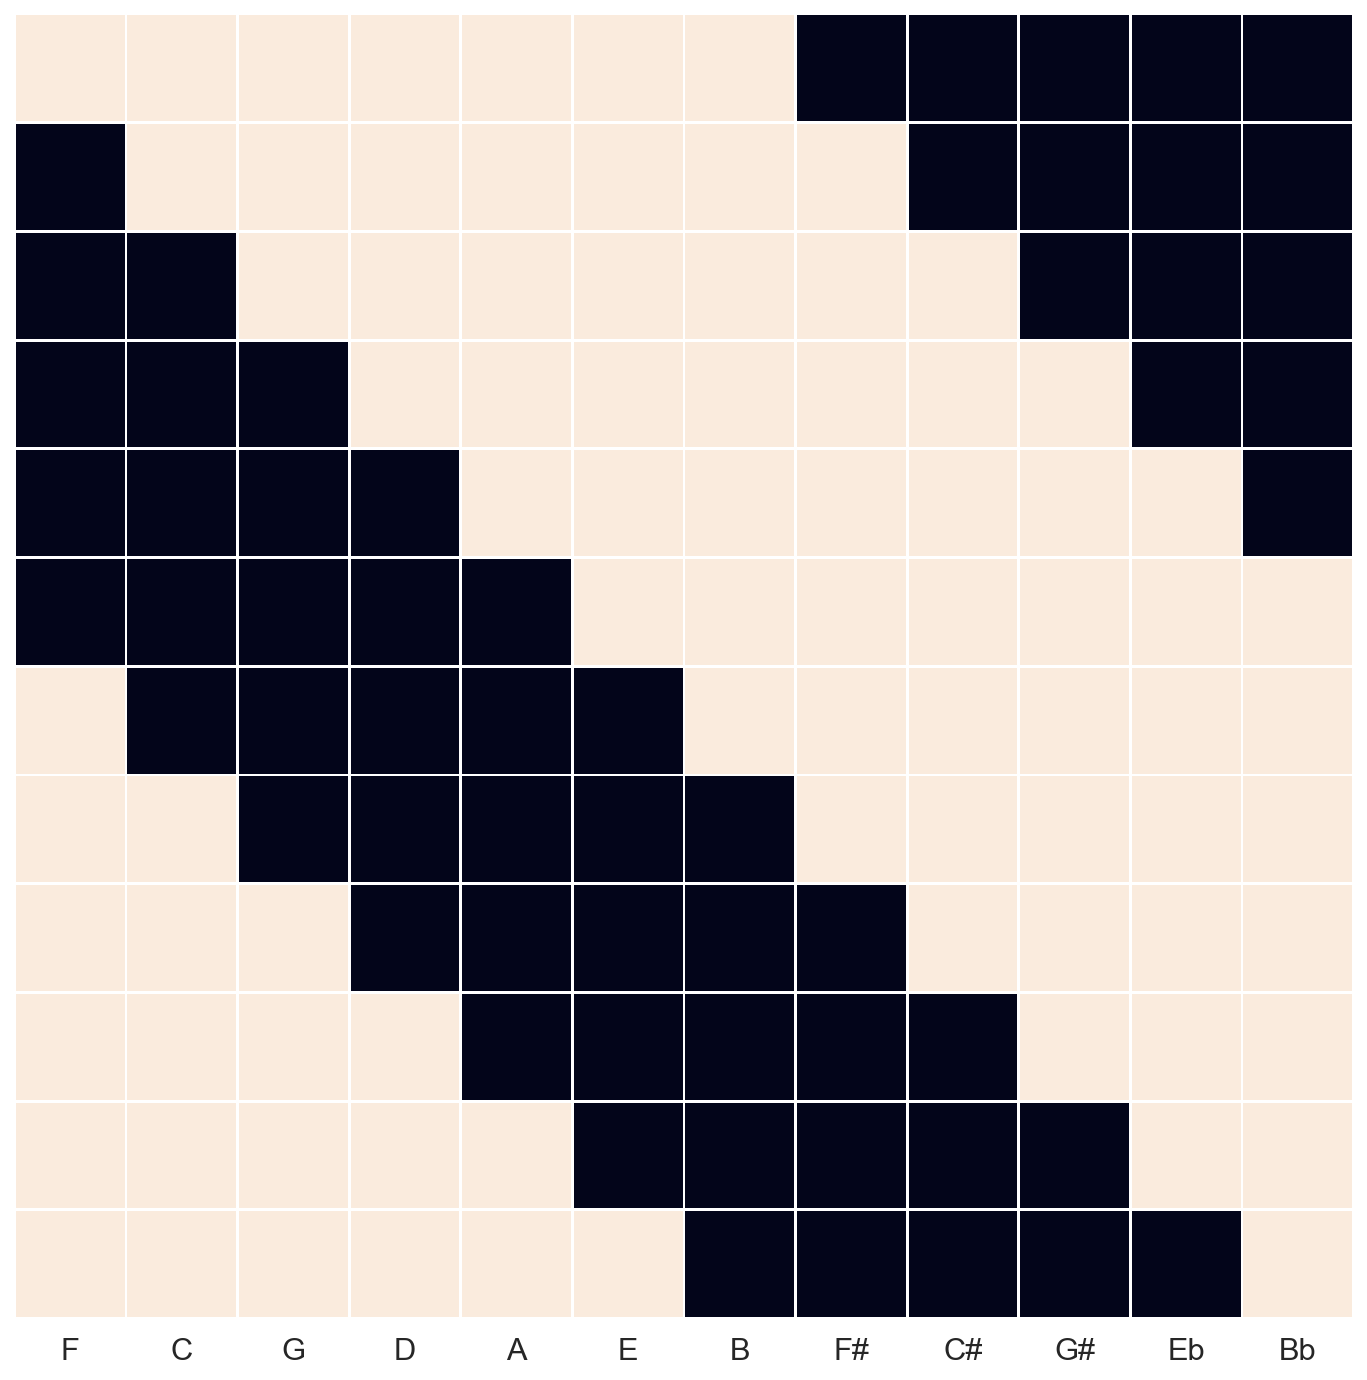

In [6]:
import numpy as np

circle_of_fifths = np.array([pt_utils.rotate_bits_right(0b111111100000, i) for i in range(12)])
jpt_pt.multiple_notegroup_heatmap(circle_of_fifths)

# 2) analyzing tones

Another interesting side effect is that a tone, acknowledged within a tonality, can better register its own disturbances -- primarily caused by its own feedback in the third harmonic. Here is a chromatic analysis of a single tone (C) played on a violin.  Its complex resonances fall largely within the C and the G above it. Interestingly, when the note fades out, the chormatic tones 

There are too many systems and too many patterns to count, but this is consistent building block. The number 3.

In [7]:
import librosa
import librosa.display

import matplotlib.pyplot as plt

filename = "../audio/violin_c.mp3"
y, sr = librosa.load(filename)
chroma_a = librosa.feature.chroma_cens(y=y, sr=sr)

/Users/johntimothysummers/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


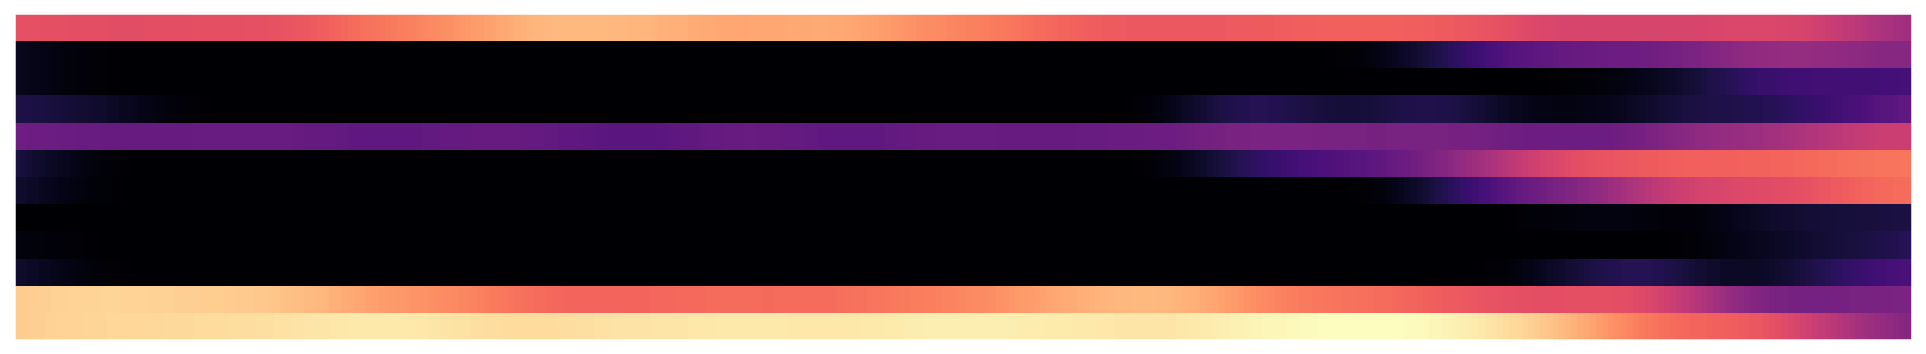

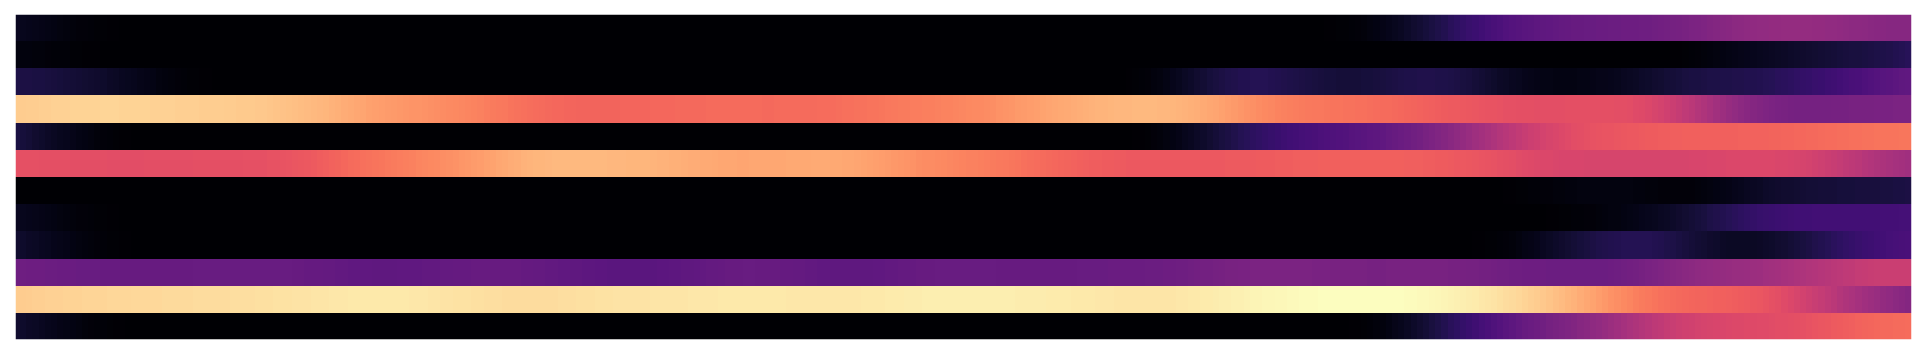

In [14]:
plt.figure(figsize=(17, 3))
librosa.display.specshow(chroma_a)
plt.figure(figsize=(17, 3))
librosa.display.specshow(jpt_pt.switch_chroma(chroma_a))
ipd.Audio(filename)

***

# Resolving Entropy

A last step: merely suggestive. Consider the resolution of a tritone, as the reduction from a 7-tone to a 5-tone space. 

This is not a theory: just a potential tool.

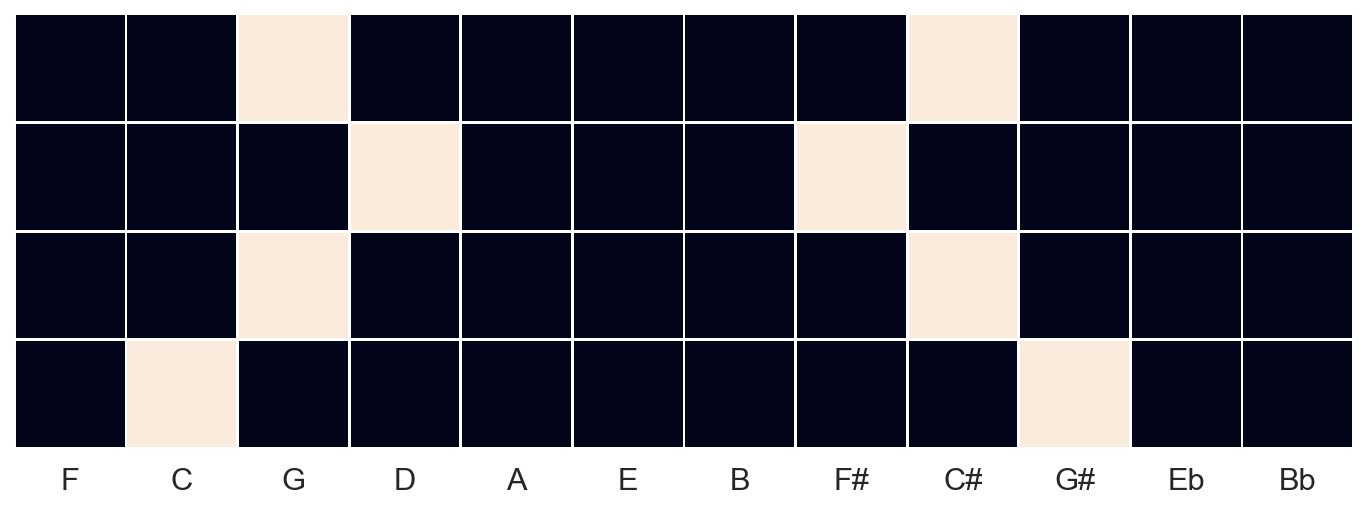

In [8]:
tritone = 0b1000001000
third = 0b0100010000
sixth = 0b010000000100

sequence = [tritone, third, tritone, sixth]

jpt_pt.multiple_notegroup_heatmap(sequence)

resolution = jpt_pt.link_wavepile_sequences(sequence)
ipd.Audio(resolution, rate=4000)

It looks like resolution. It sounds like a resolution. Maybe it is, somehow.

And some very simple patterns are just nice. There is a **lot** of room for fooling.

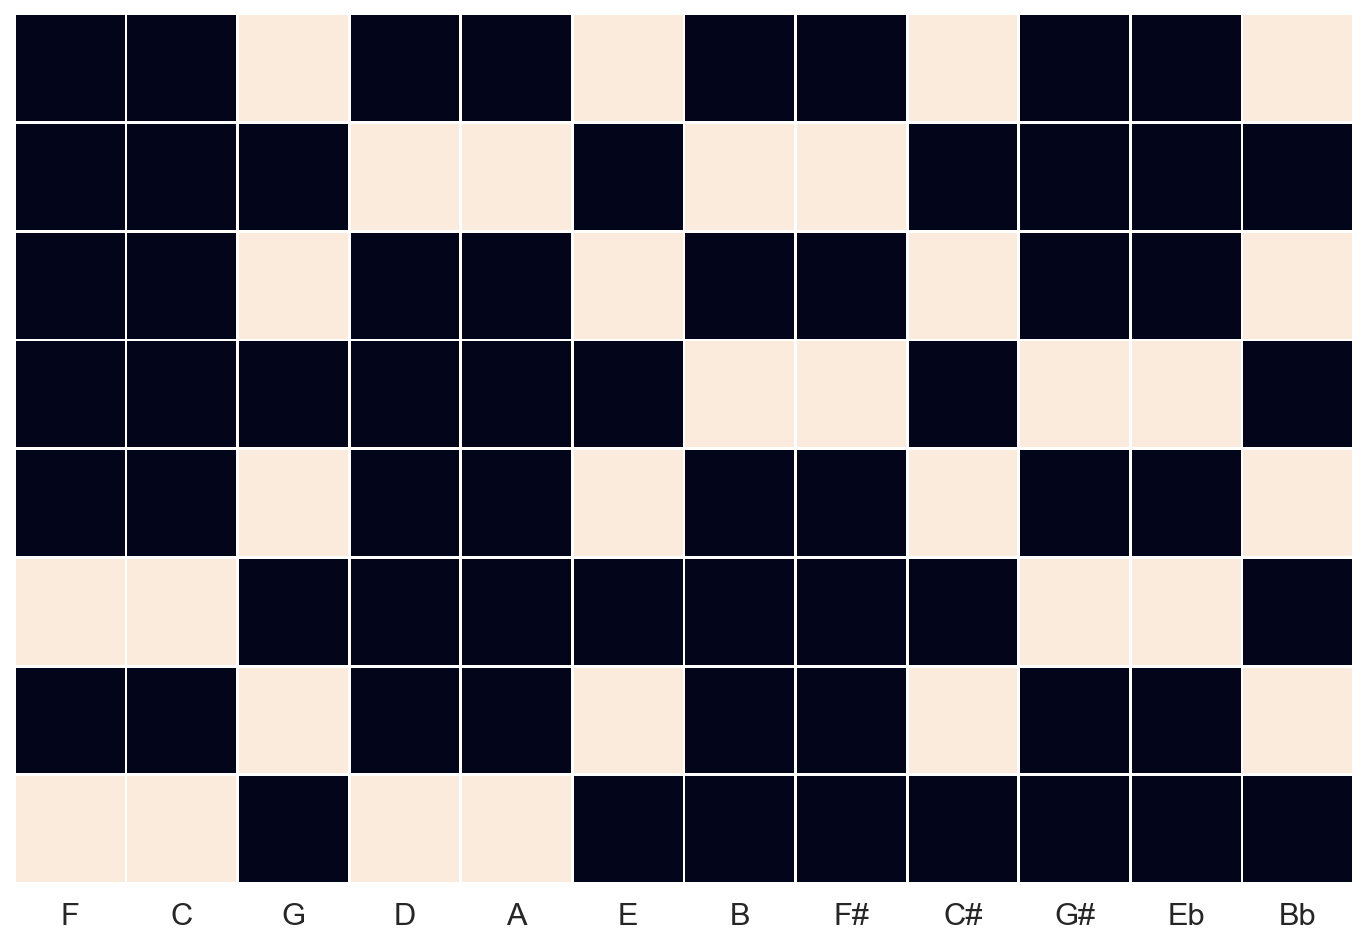

In [32]:
tritone = 0b1001001001
third = 0b0110110000
third2 = pt_utils.rotate_bits_right(third, 3)
third3 = pt_utils.rotate_bits_right(third, 6)
third4 = pt_utils.rotate_bits_right(third, 9)

sequence = [tritone, third, tritone, third2, tritone, third3, tritone, third4]

jpt_pt.multiple_notegroup_heatmap(sequence)

resolution = jpt_pt.link_wavepile_sequences(sequence, duration=4)
ipd.Audio(resolution, rate=4000)

Until you remember that each of these heatmaps represents a **only 12 bits of memory**. And can be used to analyze audio.

Then, it would seem, there is a **whole lot** of room for fooling.

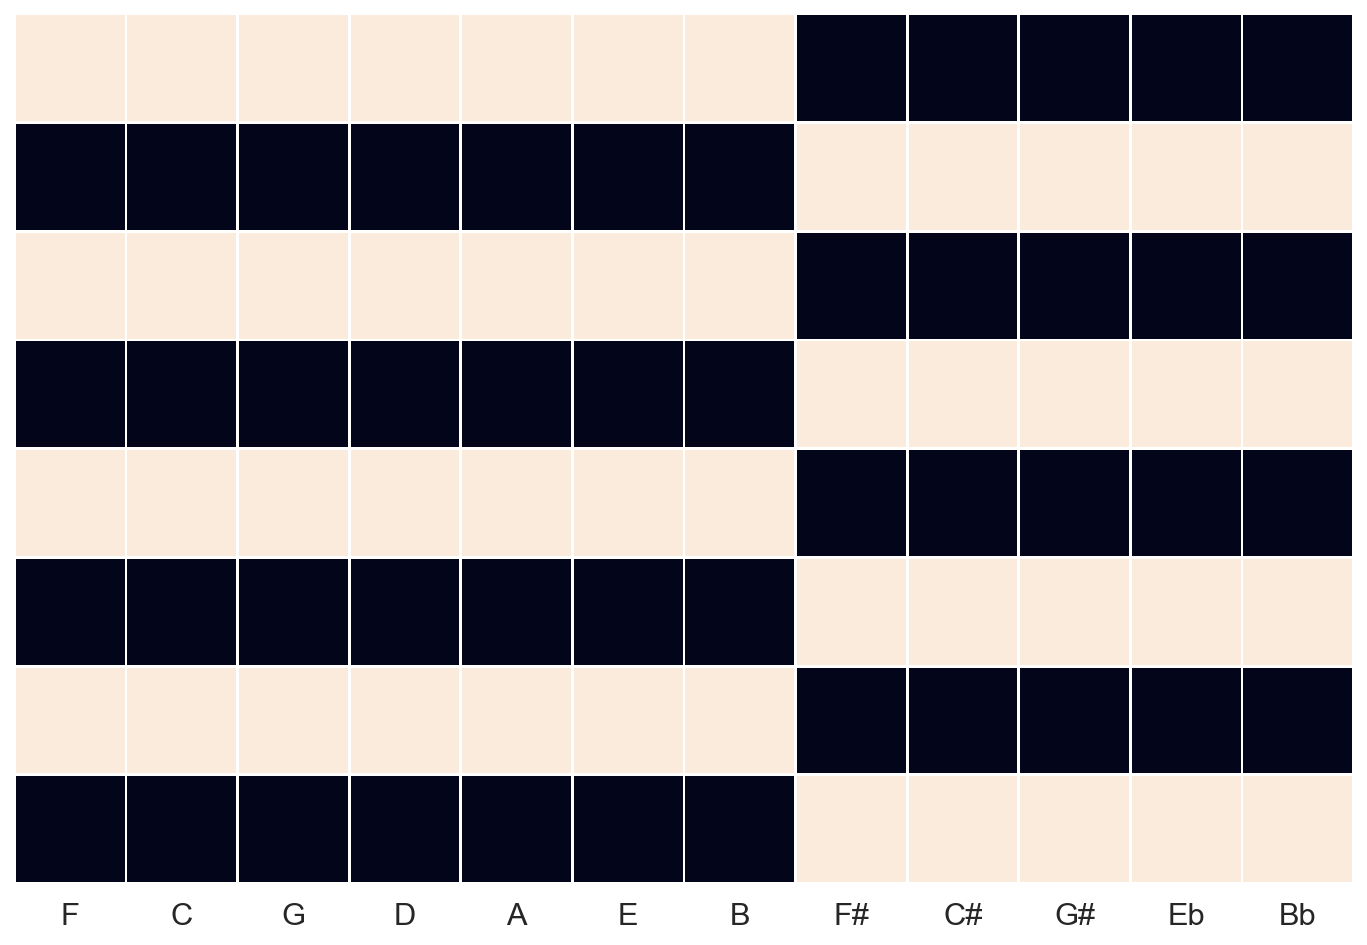

In [33]:
c = 0b111111100000
fs = 0b11111

sequence = [c, fs, c, fs,c, fs,c, fs]

jpt_pt.multiple_notegroup_heatmap(sequence)

resolution = jpt_pt.link_wavepile_sequences(sequence)
ipd.Audio(resolution, rate=4000)

# Blue in Green